<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/BackpropagationPDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Membuat model jaringan saraf tiruan dengan backpropagation
# Solusi PDP yang dicari adalah u(x,t)
def PDE_model():
    # Input layer dengan 2 input, yaitu x dan t
    inputs = tf.keras.layers.Input(shape=(2,))
    # Hidden layer dengan 3 neuron dan fungsi aktivasi ReLU
    x = tf.keras.layers.Dense(3, activation='relu')(inputs)
    # Hidden layer dengan 3 neuron dan fungsi aktivasi ReLU
    x = tf.keras.layers.Dense(3, activation='relu')(x)
    # Output layer dengan 1 neuron
    outputs = tf.keras.layers.Dense(1)(x)
    # Membuat model dengan input dan output layer
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    # Menggunakan optimizer Adam dan fungsi loss Mean Squared Error
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                  loss='mse',
                  metrics=['mse'])
    return model


In [3]:
# Fungsi untuk membuat data training
def create_training_data(N=1000, T=1.0):
    # Membuat data x dan t secara acak
    x = np.random.uniform(low=-1.0, high=1.0, size=(N, 1))
    t = np.random.uniform(low=0.0, high=T, size=(N, 1))
    # Membuat data u(x,t) dengan PDP yang diberikan
    u = np.exp(-t) * np.sin(np.pi * x) * np.sin(2.0 * np.pi * t)
    # Mengembalikan data x, t, dan u dalam bentuk array numpy
    return np.hstack((x, t)), u

In [4]:
# Fungsi untuk melakukan training model
def train_model(model, X, y, epochs=100):
    # Melatih model dengan data training
    history = model.fit(X, y, epochs=epochs, batch_size=32, verbose=0)
    # Mengembalikan model yang telah dilatih dan history dari pelatihan
    return model, history

In [5]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X, y):
    # Mengevaluasi model dengan data test
    loss, accuracy = model.evaluate(X, y, verbose=0)
    # Mengembalikan nilai loss dan akurasi
    return loss, accuracy

In [6]:
# Fungsi untuk membuat plot dari hasil pelatihan model
def plot_history(history):
    # Membuat plot dari loss dan akurasi
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mse'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()

In [7]:
# Membuat data training
X_train, y_train = create_training_data()

In [8]:
# Membuat model
model = PDE_model()


In [9]:
# Melatih model
model, history = train_model(model, X_train, y_train, epochs=100)

In [10]:
X_test, y_test = create_training_data(N=100)
loss, accuracy = evaluate_model(model, X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Test loss: 0.0184, Test accuracy: 0.0184


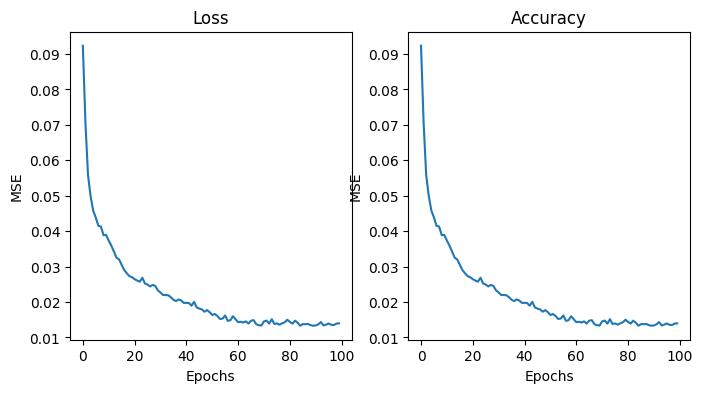

In [11]:
plot_history(history)

In [12]:
x = np.linspace(-1, 1, 100)
t = np.linspace(0, 1, 100)
X_pred = np.transpose([np.tile(x, len(t)), np.repeat(t, len(x))])

In [13]:
u_pred = model.predict(X_pred)

313/313 [==============================] - 1s 1ms/step


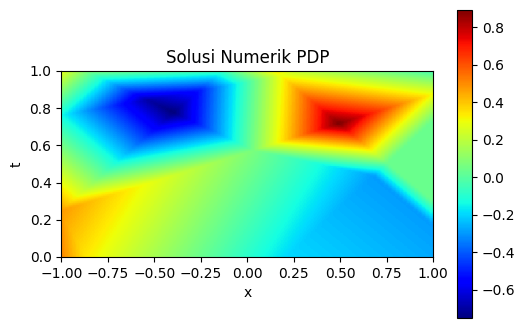

In [14]:
X_pred_grid = np.transpose([x, t])
u_pred_grid = np.reshape(u_pred, (len(t), len(x)))
plt.figure(figsize=(6, 4))
plt.imshow(u_pred_grid, extent=[-1, 1, 0, 1], cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Solusi Numerik PDP')
plt.show()

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


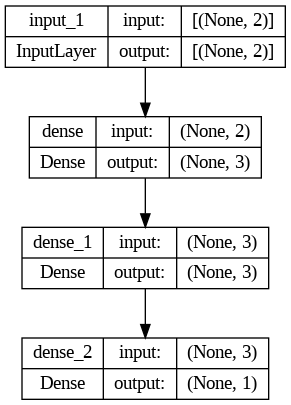

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)